   Features  Coefficients  Odds_Ratio
0   MinTemp      0.195729    1.216197
1   MaxTemp     -0.200429    0.818380
2  Rainfall      0.055378    1.056940
Optimization terminated successfully.
         Current function value: 0.449749
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           RainTomorrow   No. Observations:                39494
Model:                          Logit   Df Residuals:                    39490
Method:                           MLE   Df Model:                            3
Date:                Tue, 17 Dec 2024   Pseudo R-squ.:                  0.1448
Time:                        09:57:53   Log-Likelihood:                -17762.
converged:                       True   LL-Null:                       -20770.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------

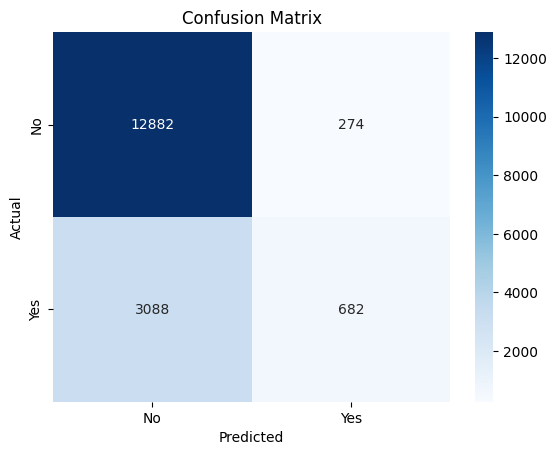

Weighted Confusion Matrix:
[[9653 3503]
 [1301 2469]]
Weighted Accuracy: 0.72


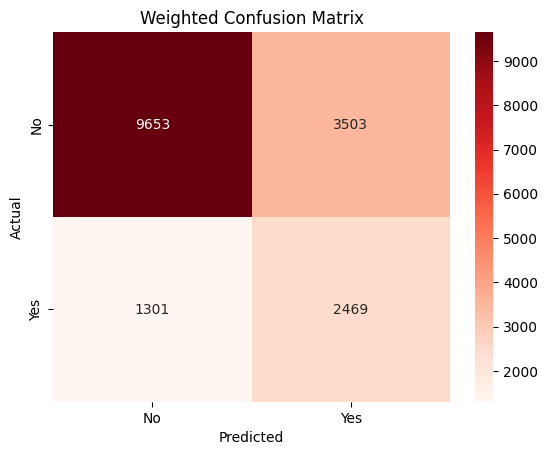

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import statsmodels.api as sm

# Loading the weather dataset
weather_data = pd.read_csv('weather.csv')

# Checking for missing values and dropping them
weather_data.dropna(inplace=True)

# Defining target and features
X = weather_data[['MinTemp', 'MaxTemp', 'Rainfall']]
y = weather_data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic regression with scikit-learn
model = LogisticRegression()
model.fit(X_train, y_train)

# Coefficients and odds ratios
coefficients = pd.DataFrame({
    'Features': X.columns,
    'Coefficients': model.coef_[0],
    'Odds_Ratio': np.exp(model.coef_[0])
})
print(coefficients)

# Rainfall analysis
X_sm = sm.add_constant(X_train)
logit_model = sm.Logit(y_train, X_sm)
result = logit_model.fit()
print(result.summary())

# Rainfall coefficient interpretation
rainfall_coef = result.params['Rainfall']
rainfall_pvalue = result.pvalues['Rainfall']
rainfall_conf_int = result.conf_int().loc['Rainfall']
print(f"Rainfall Coefficient: {rainfall_coef}")
print(f"Rainfall P-Value: {rainfall_pvalue}")
print(f"Rainfall Confidence Interval: {rainfall_conf_int}")

# Predicting on the test set
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plotting confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Weighted logistic regression
weighted_model = LogisticRegression(class_weight={0: 1, 1: 3})
weighted_model.fit(X_train, y_train)
y_pred_weighted = weighted_model.predict(X_test)

# Weighted confusion matrix
conf_matrix_weighted = confusion_matrix(y_test, y_pred_weighted)
print("Weighted Confusion Matrix:")
print(conf_matrix_weighted)

# Weighted accuracy
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
print(f"Weighted Accuracy: {accuracy_weighted:.2f}")

# Plotting weighted confusion matrix
sns.heatmap(conf_matrix_weighted, annot=True, fmt="d", cmap="Reds", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Weighted Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#Observations
#Rainfall has positive and significant impact on predicting rain tomorrow (Coefficient = 0.0554, P-value ≈ 0)
#In unweightened model, high accuracy (0.80) but low recall for "Yes" (0.18).FN = 3088, many "Yes" cases missed
#In weightened model, recall for "Yes" improved (0.18 → 0.65), FN reduced (3088 → 1301),accuracy dropped to 0.72 due to increased false positives(FP = 3503)


